In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as   plt
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

In [2]:
df =  pd.read_csv('diabetes01.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [6]:
#replacing the zeros  
zero_not_accepted = ['Glucose' ,'BloodPressure','SkinThickness','Insulin' , 'BMI'] 
for column in zero_not_accepted :
    df[column] = df[column].replace(0 , np.NaN)
    mean = int(df[column].mean(skipna = True ))
    df[column] = df[column].replace(np.NaN , mean)

In [11]:
#spliting the data 

X =  df.iloc[: , 0:8]
y = df.iloc[: , 8]

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state =  0  , test_size = 0.2)

In [12]:
# Feutures scaling 

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

In [17]:
#define the  model 

classifier = KNeighborsClassifier(n_neighbors=11 , p = 2 , metric = 'euclidean' )
#fit the model 
classifier.fit( X_train , y_train )




KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [18]:
# predict the test set 
y_predct = classifier.predict(X_test)

In [34]:
df_comp = pd.DataFrame({'actual ' : y_test  , 'predected ' : y_predct})
df_comp


,actual,predected
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


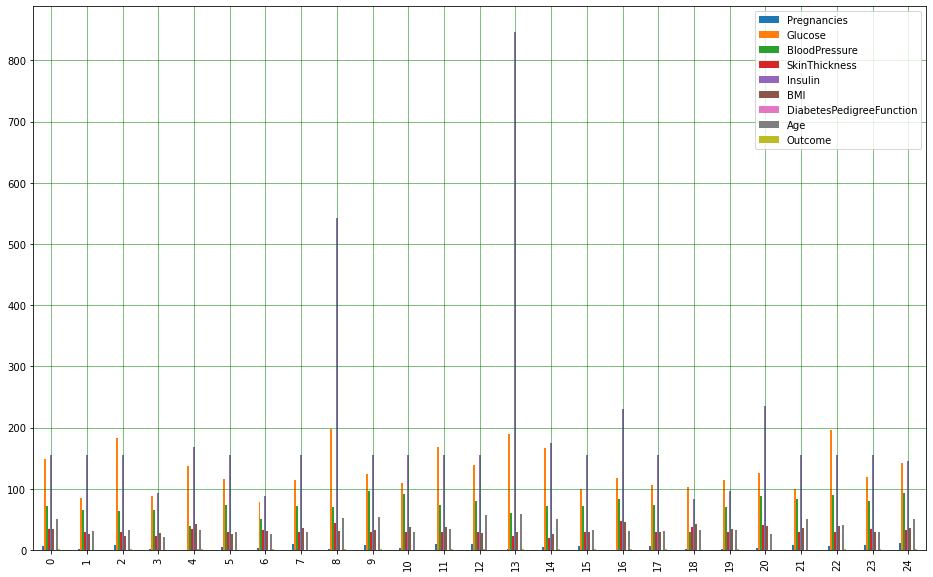

In [35]:
df2 = df.head(25)
df2.plot(kind ='bar' , figsize = (16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()




In [29]:
#evaulting the model 
print(f1_score(y_test , y_predct ))

0.6956521739130436


In [30]:
print(accuracy_score(y_test , y_predct))

0.8181818181818182
